In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # load dataset



In [6]:
#3. Normalize the data (scale pixel values to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


NameError: name 'x_train' is not defined

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1) # reshape for CNN input
x_test = x_test.reshape(-1, 28, 28, 1) #-1 means "figure this dimension out automatically"

NameError: name 'x_train' is not defined

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9424 - loss: 0.1953 - val_accuracy: 0.9747 - val_loss: 0.0800
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.9825 - val_loss: 0.0519
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9811 - val_loss: 0.0572
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9893 - loss: 0.0347 - val_accuracy: 0.9837 - val_loss: 0.0458
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9924 - loss: 0.0258 - val_accuracy: 0.9864 - val_loss: 0.0425
Test Accuracy:  98.64 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


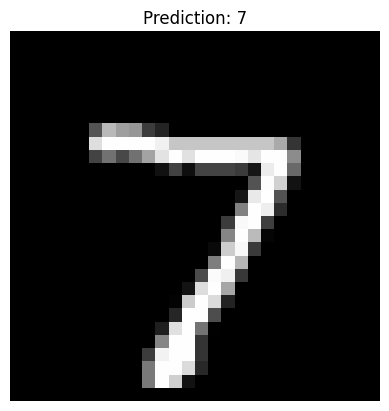

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model =models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#COMPILE MODEL
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


#TRAIN THE MODEL
history = model.fit(
    X_train, y_train, epochs = 5,
    batch_size=64, #faster training
    validation_data = (X_test, y_test),
    verbose=1     #show progress bbar
)

#EVALUATE ON TEST DATA
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print("Test Accuracy: ", round(test_acc * 100, 2), "%")

#PREDICT EXAMPLE

prediction = model.predict(X_test[:1])
predicted_label = prediction.argmax()
plt.imshow(X_test[0].reshape(28,28), cmap="gray")
plt.title("Prediction: "+ str(predicted_label))
plt.axis("off")
plt.show()



In [9]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])